<a href="https://colab.research.google.com/github/cnukaus/learner/blob/master/Lecture_2_CRoss_Industry_Standard_Process_for_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tableau Report as following link
https://public.tableau.com/shared/Y734749CG?:display_count=yes&:origin=viz_share_link

<img height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px">

<h1>CRISP-DM Methodology</h1>



# Prepare Environment

Upload your data tip:
Run git command in Colab: https://medium.com/@yuraist/how-to-upload-your-own-dataset-into-google-colab-e228727c87e9

# Explore!

## Getting Started

There is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:
According to PEP8 naming convention

In [1]:
# Python libraries
import math
import re
import datetime

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline   

# https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline#answer-43028034
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 15 , 10



In [2]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 1970  , df[ var ].max() ) )
    facet.add_legend()
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
# https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial

def histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( df[ var ].min() , df[ var ].max() ) )
    facet.add_legend()

def categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())
        

### Data Loading

In [3]:
#!git clone https://github.com/SheepOrange/learner.git
#!ls

### Get field type information

In [4]:
df = pd.read_csv('../../lecture02/L2-AviationData.csv', sep=',', header=0, encoding = 'iso-8859-1')

df.sample(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
4783,20160105X03834,Accident,ERA16WA079,2015-12-06,"Trindade, Brazil",Brazil,-16.653333,-49.609444,SWNV,Aerodromo Nacional de Aviacao,...,Personal,NaN,3.0,NaN,NaN,NaN,UNK,NaN,Foreign,NaN
76411,20001214X44561,Accident,LAX83FA434,1983-09-10,"BIG BEAR, CA",United States,NaN,NaN,L35,BIG BEAR CITY,...,Personal,NaN,1.0,0.0,3.0,0.0,VMC,TAKEOFF,Probable Cause,NaN
38971,20001211X09885,Accident,LAX98LA132,1998-04-06,"PRESCOTT, AZ",United States,NaN,NaN,PRC,EARNEST A. LOVE FIELD,...,Personal,NaN,0.0,0.0,1.0,0.0,VMC,LANDING,Probable Cause,2001-02-15
9894,20120910X71500,Accident,WPR12LA410,2012-09-08,"Viola, ID",United States,46.829445,-116.998055,NaN,NaN,...,Business,NaN,1.0,NaN,NaN,NaN,VMC,MANEUVERING,Probable Cause,2014-12-19
7915,20131210X61510,Accident,ERA14WA069,2013-12-04,"Novo Prgresso, Brazil",Brazil,-8.175000,-53.452500,SJNP,Novo Progresso Airport,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,Foreign,2013-12-11
33495,20001212X21777,Accident,LAX00LA305,2000-08-18,"FLAGSTAFF, AZ",United States,NaN,NaN,FLG,PULLIAM,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,GO-AROUND,Probable Cause,2001-07-17
30272,20020412X00509,Accident,ATL02LA073,2002-04-04,"Pensacola, FL",United States,30.398611,-87.348611,82J,Feregenson Airport,...,Personal,NaN,NaN,NaN,NaN,2.0,VMC,LANDING,Probable Cause,2004-03-02
15353,20090925X04301,Accident,CEN09FA603,2009-09-24,"Houma, LA",United States,29.541666,-90.663333,HUM,Houma Terrebonne Airport,...,Business,NaN,1.0,NaN,NaN,NaN,IMC,TAKEOFF,Probable Cause,2010-07-01
81768,20020917X01704,Accident,ATL82DA106,1982-04-17,"COLLEGE PARK, MD",United States,NaN,NaN,CGS,COLLEGE PARK,...,Personal,NaN,0.0,0.0,1.0,1.0,VMC,TAKEOFF,Probable Cause,1983-04-17
82409,20020917X02139,Accident,FTW82FRD08,1982-02-02,"JEANERETTE, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,VMC,UNKNOWN,Probable Cause,1983-02-02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82635 entries, 0 to 82634
Data columns (total 31 columns):
Event.Id                  82635 non-null object
Investigation.Type        82634 non-null object
Accident.Number           82635 non-null object
Event.Date                82635 non-null object
Location                  82560 non-null object
Country                   82128 non-null object
Latitude                  28732 non-null float64
Longitude                 28723 non-null float64
Airport.Code              46776 non-null object
Airport.Name              49514 non-null object
Injury.Severity           82635 non-null object
Aircraft.Damage           80043 non-null object
Aircraft.Category         25900 non-null object
Registration.Number       79053 non-null object
Make                      82562 non-null object
Model                     82533 non-null object
Amateur.Built             82008 non-null object
Number.of.Engines         78026 non-null float64
Engine.Type             

### Plot first

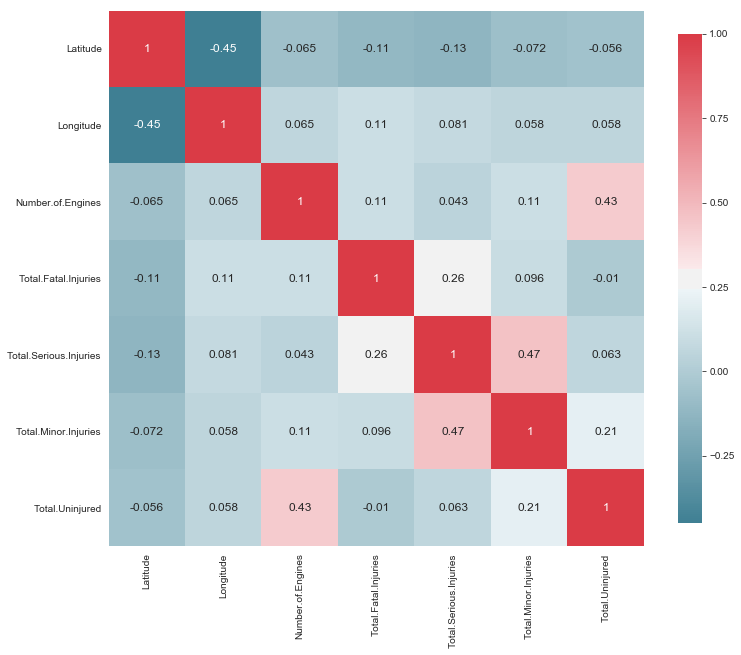

In [6]:
plot_correlation_map(df)

### Clean data

In [7]:
df['Make'] = df['Make'].str.upper()
df['Air.Carrier'] = df['Air.Carrier'].str.upper()
print "Number of Makers: %d" % df['Make'].nunique()
print "Number of Carrier: %d" % df['Air.Carrier'].nunique()

Number of Makers: 7091
Number of Carrier: 2859


In [8]:
df['Year'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
df['Month'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").month)
df['Day'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").day)

#### Add Continent Column

In [9]:
co = pd.DataFrame()
co['Country'] = df['Country'].unique()
co.to_csv('Country.csv')
coco = pd.read_csv('coco.csv',sep=',', header=0)

df=pd.merge(df,coco,how='left',on='Country')
df.sample(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date,Year,Month,Day,Continent
18552,20080317X00321,Accident,CHI08CA088,2008-02-24,"Fremont, OH",United States,41.333056,-83.161111,NaN,NaN,...,NaN,1.0,VMC,NaN,Probable Cause,2008-03-31,2008,2,24,North America
20543,20070312X00273,Accident,ATL07CA047,2007-03-05,"Cartersville, GA",United States,34.123056,-84.841666,NaN,NaN,...,NaN,1.0,VMC,LANDING,Probable Cause,2007-04-25,2007,3,5,North America
52649,20001211X14245,Accident,BFO92LA042,1992-03-17,"STEVENSVILLE, MD",United States,NaN,NaN,3W3,KENTMOOR AIRPARK,...,0.0,2.0,VMC,APPROACH,Probable Cause,1993-08-13,1992,3,17,North America
70719,20001214X36860,Accident,MKC85FA133,1985-06-16,"GRAVOIS MILLS, MO",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,VMC,MANEUVERING,Probable Cause,NaN,1985,6,16,North America
54440,20001212X17226,Accident,CHI91LA194A,1991-06-16,"MUNDELEIN, IL",United States,NaN,NaN,LL09,AIR ESTATES,...,0.0,4.0,VMC,TAKEOFF,Probable Cause,1993-03-24,1991,6,16,North America
37937,20001211X10816,Accident,CHI98LA329,1998-08-22,"LAPAZ, IN",United States,NaN,NaN,II38,SHERK FIELD,...,0.0,1.0,VMC,LANDING,Probable Cause,2001-02-15,1998,8,22,North America
13953,20101014X55320,Accident,CEN11CA018,2010-07-31,"Newton, KS",United States,37.650000,-97.424445,EWK,Newton City,...,1.0,2.0,VMC,LANDING,Probable Cause,2011-04-07,2010,7,31,North America
2667,20170501X52315,Accident,GAA17CA251,2017-04-30,"Wheatland, WY",United States,42.077500,-105.057778,NaN,NaN,...,NaN,1.0,VMC,LANDING,Probable Cause,2017-07-20,2017,4,30,North America
17592,20080826X01327,Accident,CHI08CA231,2008-08-01,"Creston, IL",United States,41.945277,-88.923889,NaN,NaN,...,NaN,1.0,VMC,TAKEOFF,Probable Cause,2017-11-16,2008,8,1,North America
1538,20171217X21740,Accident,CEN18FA054,2017-12-17,"Reeds Spring, MO",United States,36.724723,-93.396111,NaN,NaN,...,NaN,NaN,IMC,CRUISE,Preliminary,2018-01-17,2017,12,17,North America


### Splitting date field

In [10]:
#df[~df['Country']!='United States'].sample(10)
# splitting date field in the components

df['Year'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
df['Month'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").month)
df['Day'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").day)

In [11]:
describe_more(df)

,Datatype,Levels,Variable
1,object,2,Investigation.Type
16,object,2,Amateur.Built
27,object,3,Weather.Condition
20,object,3,Schedule
11,object,3,Aircraft.Damage
29,object,4,Report.Status
17,float64,5,Number.of.Engines
34,object,7,Continent
32,int64,12,Month
28,object,12,Broad.Phase.of.Flight


In [12]:
#plot_distribution0(df,var='Year',target='Total.Uninjured',row='Continent')

In [13]:
df['Year'].min()

1948

/Users/Jason/miniconda2/lib/python2.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Jason/miniconda2/lib/python2.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Jason/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/Jason/miniconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/Jason/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Jason/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric

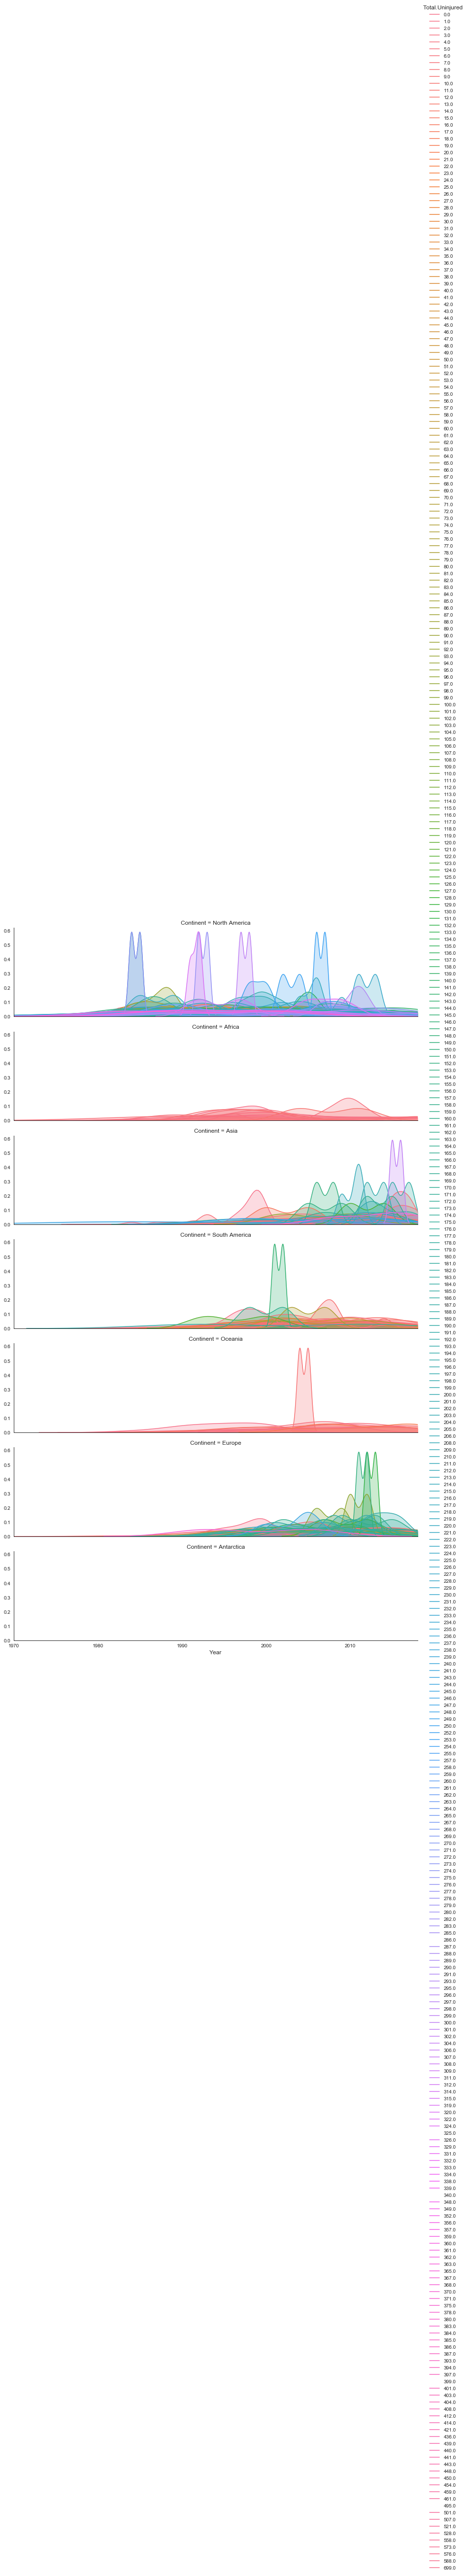

In [14]:
#df[df['Year']>1960][0:5000]['Year']
plot_distribution(df,var='Year',target='Total.Uninjured',row='Continent')

In [15]:
#df.groupby(['Country_derive']).sum()#.reset_index()



[uncomment the resetindex above]( https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum)


In [16]:
df.groupby(['Continent']).sum().reset_index()

,Continent,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Month,Day
0,Africa,-8.189244e+02,2.143508e+03,93.0,2515.0,409.0,117.0,2409.0,485490,1690,3657
1,Antarctica,-2.328503e+02,1.776331e+02,5.0,0.0,2.0,2.0,10.0,8020,37,68
2,Asia,2.670793e+03,9.975479e+03,374.0,4240.0,419.0,738.0,22084.0,1189174,3750,9408
3,Europe,2.132251e+04,5.226503e+03,721.0,4379.0,568.0,480.0,25074.0,2949229,9521,22587
4,North America,1.065286e+06,-2.690539e+06,86887.0,31710.0,15585.0,25799.0,329395.0,157026748,517912,1236311
5,Oceania,-3.864093e+03,1.878245e+04,185.0,401.0,114.0,66.0,2195.0,676861,2222,5563
6,South America,-4.519899e+03,-2.943877e+04,465.0,3549.0,593.0,469.0,9812.0,1753462,5826,13851


In [17]:
df.groupby(['Continent'])['Total.Uninjured'].agg('sum')

Continent
Africa             2409.0
Antarctica           10.0
Asia              22084.0
Europe            25074.0
North America    329395.0
Oceania            2195.0
South America      9812.0
Name: Total.Uninjured, dtype: float64

/Users/Jason/miniconda2/lib/python2.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


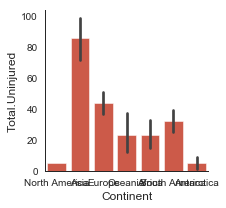

In [18]:
plot_categories(df,target='Total.Uninjured',cat='Continent')

### Check what kind of numeric data is there:
Big value - 销量大不一定反映真正的市场需求，也可能是各店面中介先优惠价屯行程

### Number of distinct values per fields

In [19]:
df.describe()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Month,Day
count,28751.000000,28742.000000,78043.000000,56702.000000,54189.000000,55363.000000,68864.000000,82691.000000,82691.000000,82691.000000
mean,37.583539,-93.425181,1.147150,0.839353,0.329753,0.514224,5.881404,1997.588613,6.585529,15.725194
std,12.326564,39.712948,0.447468,6.251858,1.457593,2.775955,29.482529,10.707085,3.061220,8.835559
min,-78.016945,-178.676111,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000,1.000000,1.000000
25%,33.346111,-114.921390,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000,4.000000,8.000000
50%,38.146666,-94.368055,1.000000,0.000000,0.000000,0.000000,1.000000,1997.000000,7.000000,16.000000
75%,42.532778,-81.630000,1.000000,1.000000,0.000000,1.000000,2.000000,2007.000000,9.000000,23.000000
max,89.218056,177.557778,4.000000,349.000000,111.000000,380.000000,699.000000,2018.000000,12.000000,31.000000


In [20]:
df_metadata=describe_more(df)
print(df_metadata)

   Datatype  Levels                Variable
1    object       2      Investigation.Type
16   object       2           Amateur.Built
27   object       3       Weather.Condition
20   object       3                Schedule
11   object       3         Aircraft.Damage
29   object       4           Report.Status
17  float64       5       Number.of.Engines
34   object       7               Continent
32    int64      12                   Month
28   object      12   Broad.Phase.of.Flight
18   object      13             Engine.Type
12   object      13       Aircraft.Category
19   object      18         FAR.Description
21   object      22       Purpose.of.Flight
33    int64      31                     Day
24  float64      40  Total.Serious.Injuries
31    int64      43                    Year
25  float64      63    Total.Minor.Injuries
23  float64     124    Total.Fatal.Injuries
10   object     126         Injury.Severity
5    object     178                 Country
26  float64     371         Tota

### Review the same output, but by type of data

In [21]:
df_metadata.sort_values(by=['Datatype','Levels'])

,Datatype,Levels,Variable
32,int64,12,Month
33,int64,31,Day
31,int64,43,Year
17,float64,5,Number.of.Engines
24,float64,40,Total.Serious.Injuries
25,float64,63,Total.Minor.Injuries
23,float64,124,Total.Fatal.Injuries
26,float64,371,Total.Uninjured
6,float64,19515,Latitude
7,float64,21017,Longitude


### Output Metedata

In [22]:
type(df_metadata.index)
df_metadata.set_index("Variable", drop = False)

df_metadata.to_csv("metadata.csv")
df.to_csv("L2-AviationData_clean.csv",sep=',', encoding = 'iso-8859-1')

In [23]:
describe_more(df).sort_values(by=['Datatype','Levels'],ascending=[True,True])

,Datatype,Levels,Variable
32,int64,12,Month
33,int64,31,Day
31,int64,43,Year
17,float64,5,Number.of.Engines
24,float64,40,Total.Serious.Injuries
25,float64,63,Total.Minor.Injuries
23,float64,124,Total.Fatal.Injuries
26,float64,371,Total.Uninjured
6,float64,19515,Latitude
7,float64,21017,Longitude


## <font color='red'>以上写法有什么潜在问题？</font>

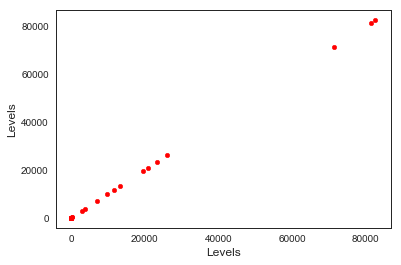

In [24]:


# a scatter plot comparing num_children and num_pets
df_metadata.plot(kind='Scatter',x='Levels',y='Levels',color='red')
plt.show()

能否看着这句代码：
### df_metadata.plot(kind='scatter',x='Levels',y='Levels',color='red')

<font color='blue'>自己写下句画Bar chart?</font>

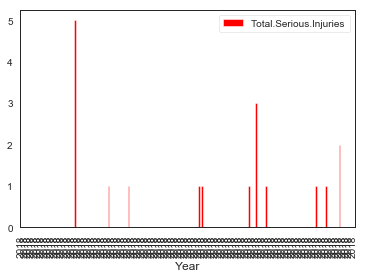

In [25]:
# Try to write your code below to draw Bar Chart:

df[0:100].plot(kind='bar',x='Year',y='Total.Serious.Injuries',color='red')

# Reference answer below

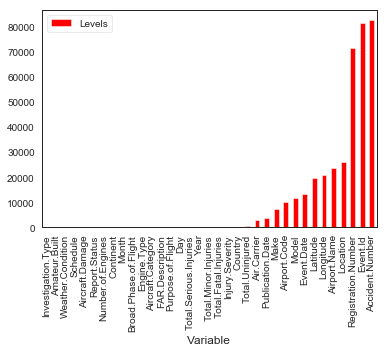

In [26]:
df_metadata.plot(kind='bar',x='Variable',y='Levels',color='red')
plt.show()

In [27]:
# Data Transformation

df['Year'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
df['Month'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").month)
df['Day'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").day)

df = df[df['Year'] >= 1982]

In [28]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date,Year,Month,Day,Continent
0,20181217X10943,Accident,GAA19CA098,2018-12-16,"Grangville, ID",United States,45.583611,-115.681667,PVT,NaN,...,NaN,1.0,NaN,NaN,Preliminary,2018-12-18,2018,12,16,North America
1,20181217X25746,Accident,GAA19CA097,2018-12-15,"MORIARTY, NM",United States,34.970000,-106.000000,NaN,MORIARTY MUNI,...,NaN,1.0,VMC,NaN,Preliminary,2018-12-20,2018,12,15,North America
2,20181213X41114,Accident,ERA19LA065,2018-12-13,"Punta Gorda, FL",United States,26.925278,-82.001111,PGD,Punta Gorda,...,1.0,NaN,VMC,APPROACH,Preliminary,2018-12-21,2018,12,13,North America
3,20181213X45528,Accident,CEN19FA044,2018-12-13,"Valparaiso, IN",United States,41.451667,-87.004444,VPZ,Porter County Rgnl,...,NaN,NaN,VMC,TAKEOFF,Preliminary,2018-12-19,2018,12,13,North America
4,20181214X90303,Accident,GAA19CA096,2018-12-11,"Hartford, WI",United States,43.330278,-88.326111,HXF,Hartford Muni,...,NaN,1.0,VMC,NaN,Preliminary,2018-12-18,2018,12,11,North America
5,20181210X21905,Accident,GAA19CA091,2018-12-10,"Chester, CT",United States,NaN,NaN,SNC,NaN,...,NaN,NaN,NaN,NaN,Preliminary,2018-12-13,2018,12,10,North America
6,20181208X53536,Accident,GAA19CA090,2018-12-08,"Hesperia, CA",United States,34.376945,-117.316111,L26,HESPERIA,...,NaN,1.0,VMC,NaN,Preliminary,2018-12-13,2018,12,8,North America
7,20181206X45049,Accident,GAA19CA088,2018-12-05,"Cornelia, GA",United States,NaN,NaN,AJR,NaN,...,NaN,2.0,NaN,NaN,Preliminary,2018-12-13,2018,12,5,North America
8,20181204X03049,Accident,GAA19CA086,2018-12-04,"Reno, NV",United States,39.658889,-119.865833,RTS,RENO/STEAD,...,NaN,2.0,IMC,NaN,Preliminary,2018-12-20,2018,12,4,North America
9,20181212X01623,Accident,ERA19LA063,2018-12-04,"Moscow, PA",United States,41.326945,-75.591111,NaN,NaN,...,NaN,1.0,VMC,CRUISE,Preliminary,2018-12-19,2018,12,4,North America


In [29]:
objects = ('Boeing','Airbus','Piper','Yun10','运','Gulfstream')
    #'SQL', 'Java', 'Python', 'Alteryx', 'Power BI', 'R')
y_pos = np.arange(len(objects))
#print(y_pos)
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Data Analysis job market tools survey')

plt.show()

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 432x288 with 1 Axes>

In [30]:
print("\\")

\


两种过滤Data Frame办法

In [31]:
categories=df_metadata[df_metadata['Datatype']=="object"]['Variable']

Flag_category=df_metadata['Datatype']=="object"

print (categories)

countries=df['Country']

#countries=countries[~np.isnan(countries)]
countries.drop_duplicates( keep='first', inplace=True)
print("There are %s countries:"%countries.count())
print (countries)

1        Investigation.Type
16            Amateur.Built
27        Weather.Condition
20                 Schedule
11          Aircraft.Damage
29            Report.Status
34                Continent
28    Broad.Phase.of.Flight
18              Engine.Type
12        Aircraft.Category
19          FAR.Description
21        Purpose.of.Flight
10          Injury.Severity
5                   Country
22              Air.Carrier
30         Publication.Date
14                     Make
8              Airport.Code
15                    Model
3                Event.Date
9              Airport.Name
4                  Location
13      Registration.Number
0                  Event.Id
2           Accident.Number
Name: Variable, dtype: object
There are 178 countries:
0                         United States
16                         South Africa
20                            Indonesia
28                               Brazil
29                             Ethiopia
32                            Australia
37   

def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

## TOO LONG DNR

In [32]:
for c in categories:
    print(c , df[c].unique())

#df[df['first_name'].notnull() & (df['nationality'] == "USA")]

(u'Investigation.Type', array([u'Accident', u'Incident', nan], dtype=object))
(u'Amateur.Built', array([u'No', u'Yes', nan], dtype=object))
(u'Weather.Condition', array([nan, u'VMC', u'IMC', u'UNK'], dtype=object))
(u'Schedule', array([nan, u'SCHD', u'NSCH', u'UNK'], dtype=object))
(u'Aircraft.Damage', array([u'Substantial', u'Destroyed', u'Minor', nan], dtype=object))
(u'Report.Status', array([u'Preliminary', u'Foreign', u'Factual', u'Probable Cause'],
      dtype=object))
('Continent', array(['North America', 'Africa', 'Asia', 'South America', 'Oceania',
       'Europe', nan, 'Antarctica'], dtype=object))
(u'Broad.Phase.of.Flight', array([nan, u'APPROACH', u'TAKEOFF', u'CRUISE', u'LANDING', u'GO-AROUND',
       u'UNKNOWN', u'TAXI', u'OTHER', u'DESCENT', u'MANEUVERING',
       u'STANDING', u'CLIMB'], dtype=object))
(u'Engine.Type', array([nan, u'Reciprocating', u'Turbo Jet', u'Turbo Fan', u'Turbo Prop',
       u'Turbo Shaft', u'Unknown', u'None', u'Electric', u'REC, ELEC',
       u'Hy

(u'Accident.Number', array([u'GAA19CA098', u'GAA19CA097', u'ERA19LA065', ..., u'MIA82DA029',
       u'FTW82DA034', u'ATL82DKJ10'], dtype=object))


## <font color='red'>Will fail</font>

In [33]:
for c in categories:
    print(c , df[c].unique().sample(5))

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [ ]:
df[countries]
   

In [ ]:
category_values(df, categories)
#print(countries)
#category_values(df, countries)

In [ ]:
print(df.groupby(['Make','Amateur.Built']).count())
#print(df.groupby(['Weather.Condition','Aircraft.Damage']).count())


In [ ]:
producers = [x for x in df['Weather.Condition'][df['Aircraft.Damage']== 'No'].unique() ]
amateurs  = [x for x in df['Weather.Condition'][df['Aircraft.Damage']== 'Yes'].unique() ]

# -----------------------------------------------
# Function that fixes the null in amateur.built
def fix_amateur_built(ab, m):
    if type(ab) == str:
        return ab
    else:
        if m in producers:
            return 'No'
        else:
            return 'Yes'
# Fix for Amateur.Built field      
am_built = df.apply(lambda x: fix_amateur_built(x['Amateur.Built'], x['Make']), axis=1)
df = df.assign(AmateurBuilt = am_built, index=df.index)

In [ ]:
print(df.groupby(['Make','Model']).count())

In [ ]:
# Function that fixes the null in number.of.engines 
def fix_number_of_engines(noe, m):
    if noe >= 0:
        return noe
    else:
        # Setting number of engines at the mean number of engines for the producer
        r = np.round(df['Number.of.Engines'][df['Make']==m].mean())
        return r

# Setting 0 engines for balloons
df['Number.of.Engines'][df['Number.of.Engines'].isnull() & (df['Make'].str.contains('balloon', case=False))] = 0.0
# Correcting number of engines
num_engines = df.apply(lambda x: fix_number_of_engines(x['Number.of.Engines'], x['Make']), axis=1)
df = df.assign(NumberofEngines = num_engines, index=df.index)
# Still some null after number of engines correction
df['NumberofEngines'].fillna(1, inplace=True)

In [ ]:
df=pd.DataFrame({"A":[14,4,5,4,1], 
                 "B":[5,2,54,3,2], 
                 "C":[20,20,7,3,8], 
                 "D":[14,3,6,2,6]}) 
df

In [ ]:
def fix_engine_type(et, model):
    if type(et) == str:
        return et
    else:
        # Setting engine type at the mode of engines for the model
        e = (df['Engine.Type'][df['Model']==model].mode())
        return  e[0] if e.count() > 0 else 'Unknown'
# Fix for Engine.Type field      
en_type = df.apply(lambda x: fix_engine_type(x['Engine.Type'], x['Model']), axis=1)
df = df.assign(EngineType = en_type, index=df.index)

In [ ]:
def fix_aircraft_category(cat, model):
    if type(cat) == str:
        return cat
    else:
        # Setting aircraft category at the mode of caterogories for the model
        e = (df['Aircraft.Category'][df['Model']==model].mode())
        return  e[0] if e.count() > 0 else 'Unknown'
# Fix for Aircraft.Category field      
aircraft_cat = df.apply(lambda x: fix_aircraft_category(x['Aircraft.Category'], x['Model']), axis=1)
df = df.assign(AircraftCategory = aircraft_cat, index=df.index)

In [ ]:
# null damages can't be defined
df[df['Aircraft.Damage'].isnull()]
df['Aircraft.Damage'].fillna('Unknown', inplace=True)

# Fixing phase of flight nulls
df['Broad.Phase.of.Flight'].fillna('UNKNOWN', inplace=True)

# Fixing weather conditions
df['Weather.Condition'].fillna('UNK', inplace=True)

# null categories can't be defined
df['Aircraft.Category'].fillna('Unknown', inplace=True)

# can't define purpose of flight
df['Purpose.of.Flight'].fillna('Unknown', inplace=True)

# don't know ho to set missing schedules 
df['Schedule'].fillna('UNK', inplace=True)

# don't know ho to set missing FAR.Description
df['FAR.Description'].fillna('Unknown', inplace=True)

# don't know ho to set missing Aircraft.Damage
df['Aircraft.Damage'].fillna('Unknown', inplace=True)

# don't know ho to set missing Air Carriers
df['Air.Carrier'].fillna('Unknown', inplace=True)

# don't know ho to set missing Makers
df['Make'].fillna('UNKNOWN', inplace=True)

# don't know ho to set missing Models
df['Model'].fillna('Unknown', inplace=True)

# don't know ho to set missing airport names
df['Airport.Name'].fillna('Unknown', inplace=True)

# don't know ho to set missing Models
df['Airport.Code'].fillna('Unknown', inplace=True)

# don't know ho to set missing Locations
df['Location'].fillna('Unknown', inplace=True)

In [ ]:
# How many still null
df.isnull().sum()

## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.